Testing some ideas

Lets decomposite the time series

get interesting features


In [12]:
# !pip install xgboost

In [18]:
import pandas as pd

In [29]:
wine_data = pd.read_csv("./test_resources/input/wine_quality.csv", sep=";")
wine_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [30]:
wine_data.shape

(4898, 12)

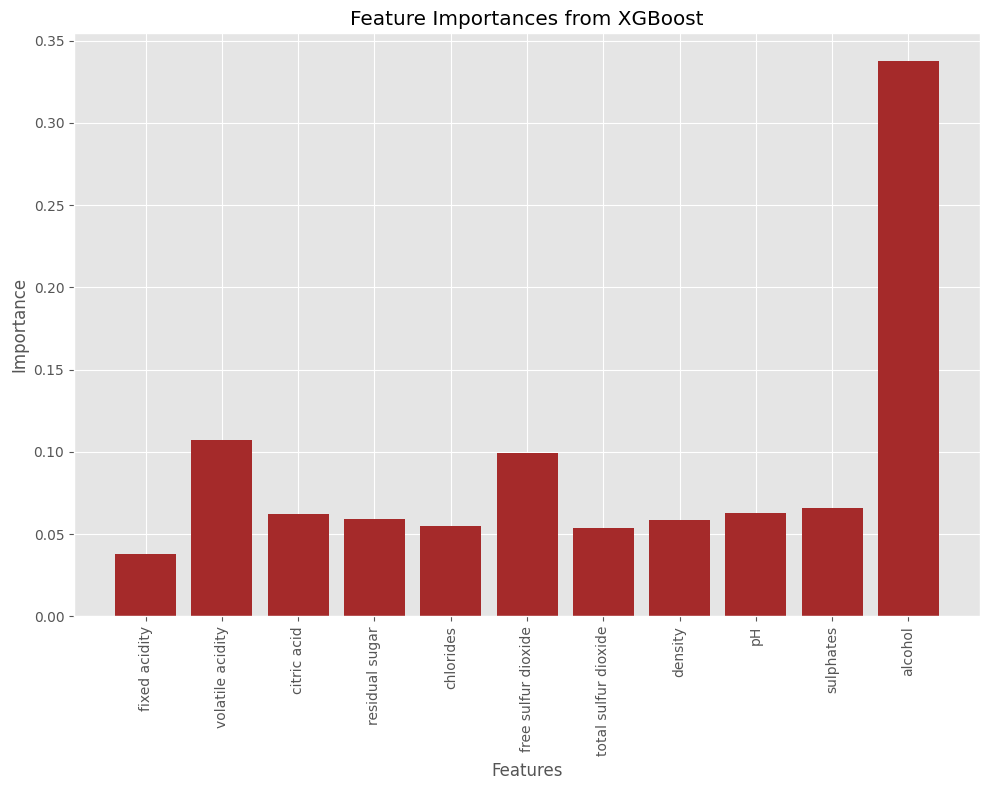

RMSE: 0.61656310650806


In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting the data into features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Getting feature importances
feature_importances = model.feature_importances_

# Creating a bar plot for feature importances
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
plt.bar(X.columns, feature_importances, color="brown")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from XGBoost')
plt.xticks(rotation=90)  # Change rotation to 90 degrees
plt.tight_layout()  
plt.show()


# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating RMSE (Root Mean Squared Error) as a measure of accuracy
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Since it's a regression problem, we use RMSE instead of traditional accuracy
print("RMSE:" , rmse)


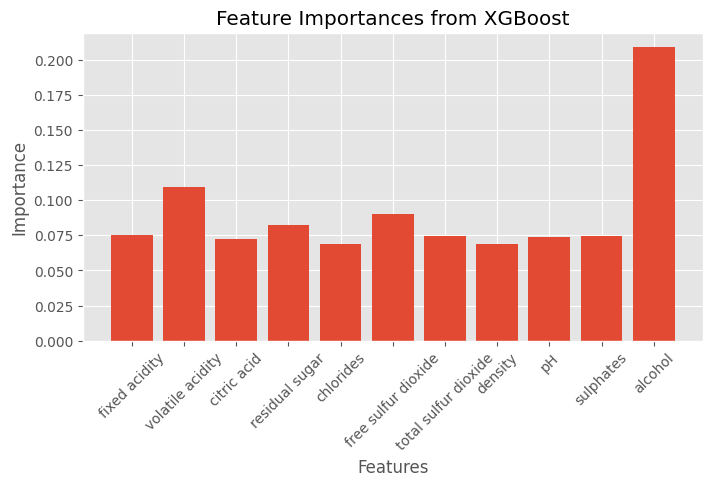

Accuracy: 0.6795918367346939


In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Label encoding the target variable
label_encoder = LabelEncoder()
wine_data['quality_encoded'] = label_encoder.fit_transform(wine_data['quality'])

# Splitting the data into features and the encoded target
X = wine_data.drop(['quality', 'quality_encoded'], axis=1)
y = wine_data['quality_encoded']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost model for classification
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Getting feature importances
feature_importances = model.feature_importances_

# Creating a bar plot for feature importances
plt.figure(figsize=(8, 4))
plt.style.use('ggplot')
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from XGBoost')
plt.xticks(rotation=45)
plt.show()

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating accuracy as a measure of performance
accuracy = accuracy_score(y_test, y_pred)

# Printing the accuracy
print("Accuracy:", accuracy)


In [51]:
#!pip install lime


In [62]:
import lime
import lime.lime_tabular

# Assuming 'model' is your trained XGBoost regression model and you have the necessary training and test sets

# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, 
    feature_names=X_train.columns, 
    mode='regression'
)

# Choose an instance to explain
instance_index = 1 # for example
instance = X_test.values[instance_index]

# Generate explanations
exp = explainer.explain_instance(instance, model.predict, num_features=len(X_train.columns))

# Show the explanations
exp.show_in_notebook(show_table=True)


/Users/sinanz/opt/anaconda3/envs/env_py311/lib/python3.11/site-packages/lime/explanation.py:194: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
/Users/sinanz/opt/anaconda3/envs/env_py311/lib/python3.11/site-packages/lime/explanation.py:251: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/sinanz/opt/anaconda3/envs/env_py311/lib/python3.11/site-packages/lime/bundle.js' mode='r' encoding='utf8'>
  encoding="utf8").read()


In [ ]:
import lime
import lime.lime_tabular

# Assuming 'model' is your trained XGBoost model and you have the necessary training and test sets

# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, 
    feature_names=X_train.columns, 
    mode='regression'
)

# Empty list to store explanations
all_explanations = []

# Explain multiple instances
for instance_index in range(len(X_test)):
    instance = X_test.values[instance_index]
    exp = explainer.explain_instance(instance, model.predict, num_features=len(X_train.columns))
    all_explanations.append(exp)

# Now you have a list of explanations for each instance
# You can aggregate the results or analyze them individually


In [65]:
from sklearn.inspection import permutation_importance

# Assuming 'model' is your trained XGBoost model and you have your test sets X_test and y_test

# Perform permutation importance
results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)

# Get feature names
feature_names = X_test.columns

# Organize the results into a dataframe
importance_frame = pd.DataFrame({
    'Feature': feature_names,
    'Importance Mean': results.importances_mean,
    'Importance Std': results.importances_std
})

# Sort the dataframe by the mean importance
importance_frame = importance_frame.sort_values(by='Importance Mean', ascending=False)

# Display the feature importances
print(importance_frame)


                 Feature  Importance Mean  Importance Std
10               alcohol         0.351316        0.024871
7                density         0.139985        0.014763
1       volatile acidity         0.137483        0.013204
5    free sulfur dioxide         0.122829        0.012001
3         residual sugar         0.121928        0.018354
6   total sulfur dioxide         0.089697        0.009854
8                     pH         0.069084        0.008942
0          fixed acidity         0.057346        0.007194
2            citric acid         0.054845        0.007997
4              chlorides         0.050710        0.008195
9              sulphates         0.041891        0.005342


If a feature has a mean importance of 0.3 with a standard deviation of 0.02 in the context of permutation importance, it means:

1. **Mean Importance of 0.3**: On average, the performance of the model decreased by 0.3 when this feature's values were randomly shuffled. This suggests that the feature has a considerable impact on the model's predictions. The performance metric that decreased by 0.3 could be accuracy for classification models, R² for regression models, or any other appropriate performance measure.

2. **Standard Deviation of 0.02**: The change in the model's performance when this feature was shuffled varied by an average of 0.02 across the different shuffling iterations. This low standard deviation implies that the effect of this feature on model performance is fairly consistent; it does not fluctuate much due to the randomness of shuffling.

In summary, a feature with these statistics is likely to be important for the model because shuffling its values reliably degrades the model's performance, and this degradation is consistent across multiple shuffles.

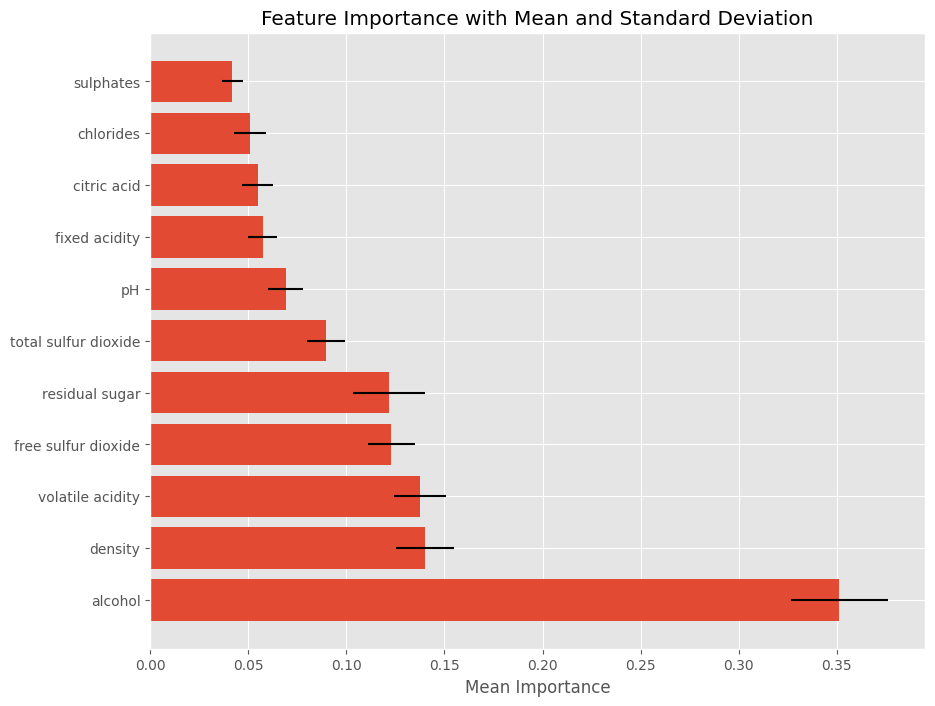

In [66]:
# Plotting
plt.figure(figsize=(10, 8))
plt.barh(importance_frame['Feature'], importance_frame['Importance Mean'], xerr=importance_frame['Importance Std'])
plt.xlabel('Mean Importance')
plt.title('Feature Importance with Mean and Standard Deviation')
plt.show()

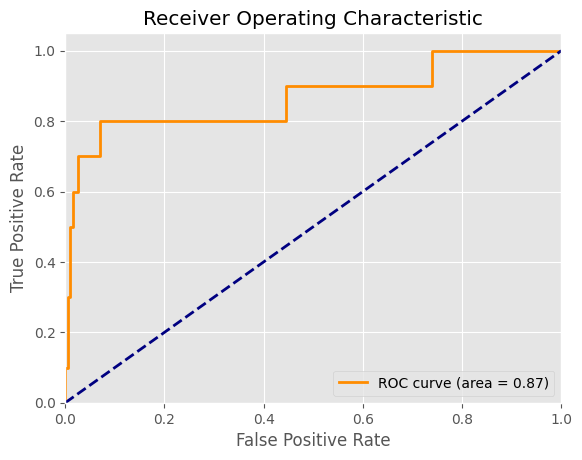

ROC-AUC Score: 0.8675


In [67]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, _ = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=42)

# Introduce outliers
outliers = np.random.uniform(low=-4, high=4, size=(10, 2))
X = np.concatenate([X, outliers])

# Labels: 0 for inliers, 1 for outliers
y = np.zeros(X.shape[0])
y[-10:] = 1  # Last 10 are outliers

model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X)

scores_pred = model.decision_function(X)
scores_pred = -scores_pred  # Invert scores: higher is more abnormal

roc_auc = roc_auc_score(y, scores_pred)

fpr, tpr, _ = roc_curve(y, scores_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("ROC-AUC Score:", roc_auc)


In [68]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.utils import resample
from sklearn.metrics import jaccard_score

# Generate synthetic data
data = np.random.randn(100, 2)  # 100 points, 2 features

# Add outliers
data = np.vstack([data, np.random.uniform(low=-6, high=6, size=(10, 2))])

# Function to perform stability testing
def stability_test(data, n_iterations=50, sample_size=0.8, n_estimators=100):
    outlier_indices = []
    
    for _ in range(n_iterations):
        # Perturb data by bootstrap sampling
        sample_data = resample(data, replace=True, n_samples=int(len(data) * sample_size))
        
        # Fit Isolation Forest
        clf = IsolationForest(n_estimators=n_estimators, contamination=0.1)
        clf.fit(sample_data)
        
        # Predict outliers
        predictions = clf.predict(data)
        outliers = predictions == -1
        outlier_indices.append(outliers)
    
    # Calculate Jaccard Index for each pair of runs
    jaccard_scores = []
    for i in range(len(outlier_indices)):
        for j in range(i + 1, len(outlier_indices)):
            score = jaccard_score(outlier_indices[i], outlier_indices[j])
            jaccard_scores.append(score)
    
    return np.mean(jaccard_scores)

# Call the stability test function
average_jaccard_index = stability_test(data)
print("Average Jaccard Index across runs:", average_jaccard_index)


Average Jaccard Index across runs: 0.6325174601609714


/Users/sinanz/opt/anaconda3/envs/env_py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5533116081110812


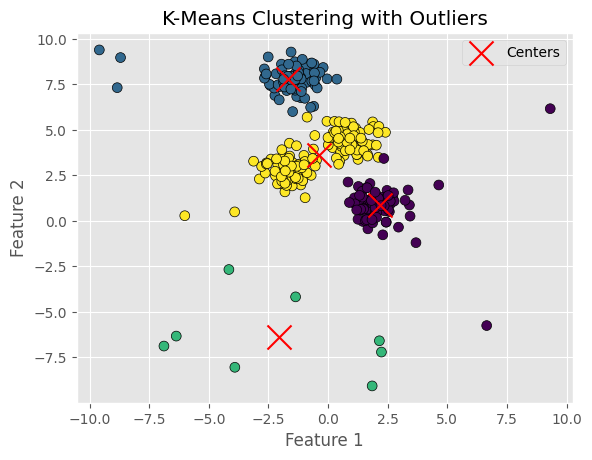

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data with some noise
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Introduce some outliers
np.random.seed(42)
n_outliers = 20
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))
X = np.vstack([X, outliers])

# Apply k-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(X)

# Calculate the silhouette score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centers')
plt.title('K-Means Clustering with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Isolation Forest Silhouette Score: 0.17888894079590925


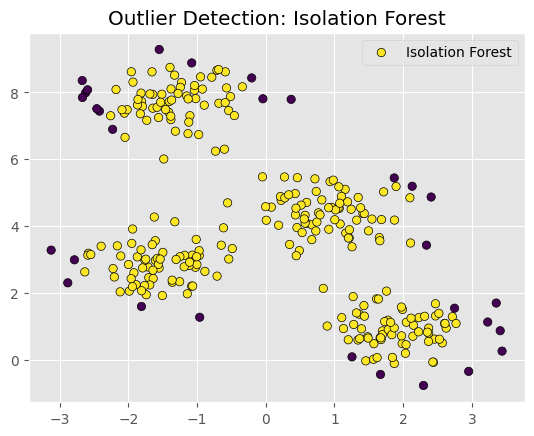

LOF Silhouette Score: 0.06831787193326098


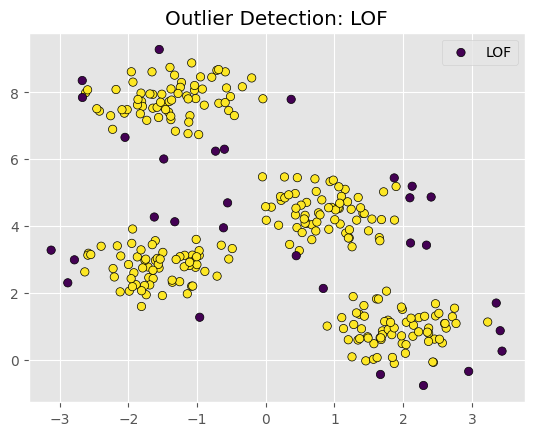

OneClassSVM Silhouette Score: 0.18746871227919445


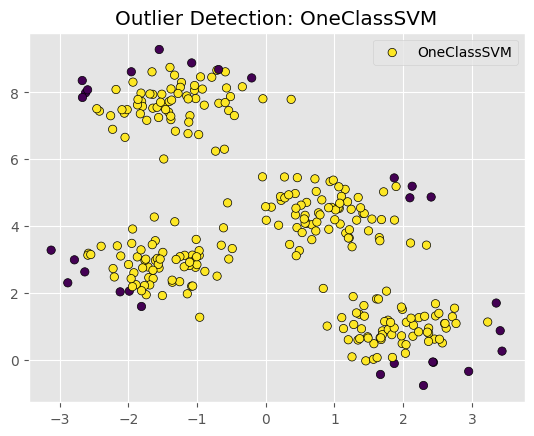

DBSCAN Silhouette Score: 0.58977292182092


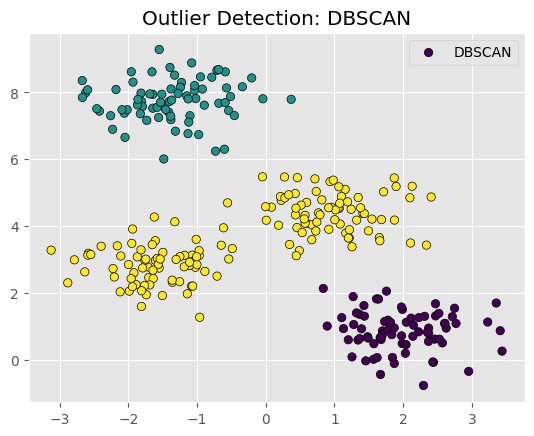

In [71]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Define outlier detection models
models = {
    "Isolation Forest": IsolationForest(contamination=0.1),
    "LOF": LocalOutlierFactor(n_neighbors=20, novelty=False, contamination=0.1),
    "OneClassSVM": OneClassSVM(nu=0.1),
    "DBSCAN": DBSCAN(eps=0.9, min_samples=5)
}

# Apply each model and evaluate using Silhouette Score where applicable and visualize it
for name, model in models.items():
    # Fit model
    if name == "LOF":  # LOF doesn't support fit_predict directly for novelty detection
        model.fit(X)
        labels = model.fit_predict(X)
    else:
        labels = model.fit_predict(X)

    # Compute the Silhouette Score for those that output cluster labels
    if np.unique(labels).size > 1:  # More than 1 cluster is needed for silhouette score
        score = silhouette_score(X, labels)
        print(f"{name} Silhouette Score: {score}")
    else:
        print(f"{name} cannot compute Silhouette Score with labels: {np.unique(labels)}")

    plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolor='k', label=f"{name}")
    plt.title(f"Outlier Detection: {name}")
    plt.legend()
    plt.show()


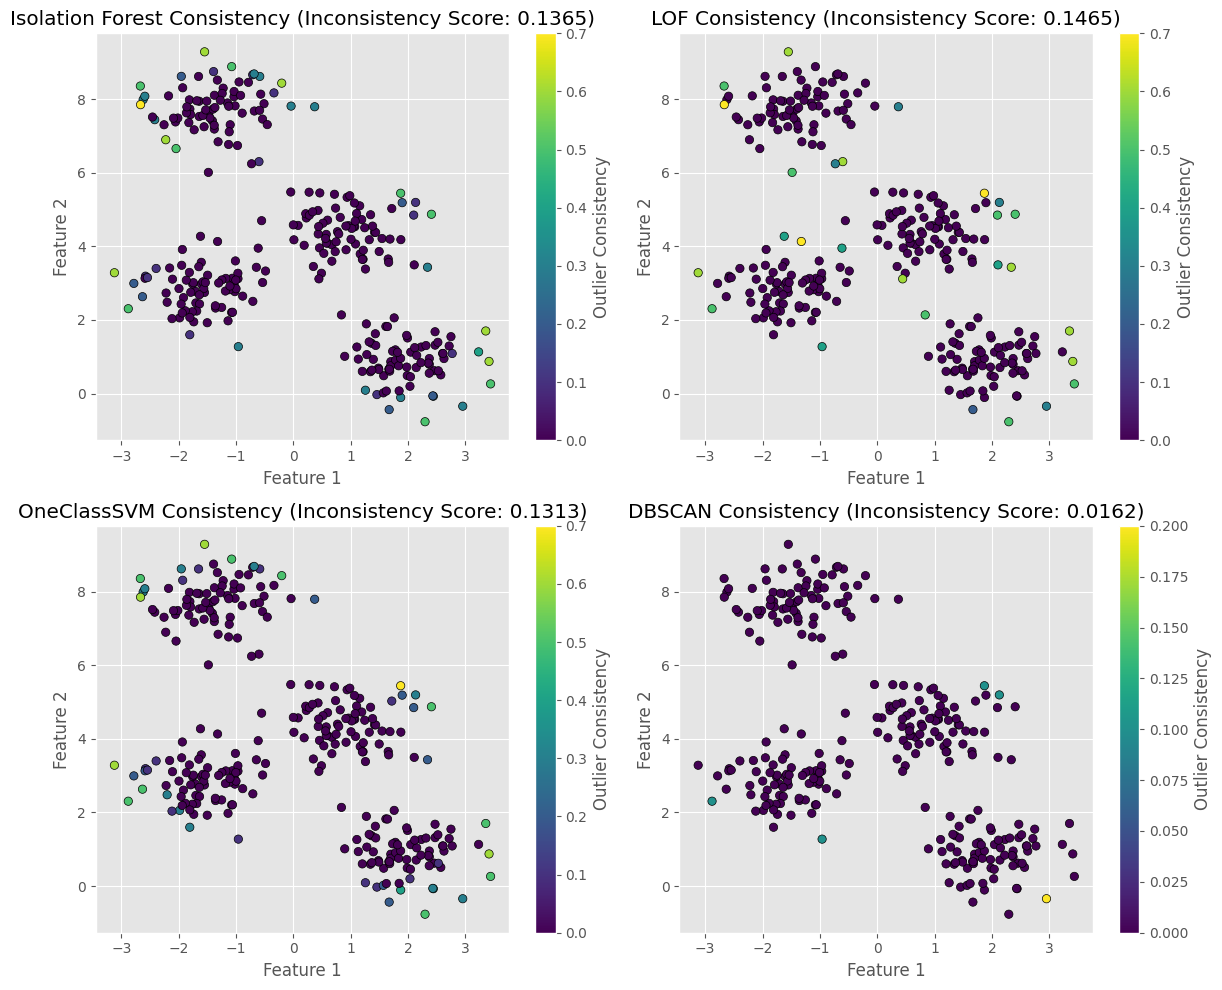

{'Isolation Forest': 0.13650396819628846,
 'LOF': 0.14651924409062753,
 'OneClassSVM': 0.13125505281279226,
 'DBSCAN': 0.016206994374857623}

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ShuffleSplit

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Define outlier detection models
models = {
    "Isolation Forest": IsolationForest(contamination=0.1, random_state=42),
    "LOF": LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1),
    "OneClassSVM": OneClassSVM(nu=0.1),
    "DBSCAN": DBSCAN(eps=0.9, min_samples=5)
}

# Setup to measure consistency across subsamples
n_splits = 10
ss = ShuffleSplit(n_splits=n_splits, test_size=0.5, random_state=42)

# Record outlier frequencies
outlier_frequencies = {name: np.zeros(len(X)) for name in models}

# Evaluate each model
for train_index, _ in ss.split(X):
    X_train = X[train_index]
    for name, model in models.items():
        if name == "LOF":
            model.fit(X)  # Fit on full data
            predictions = model.predict(X_train)  # Predict on subsample
        else:
            predictions = model.fit_predict(X_train)
        
        # Mark outliers from predictions
        outliers = np.where(predictions == -1)[0]
        outlier_frequencies[name][train_index[outliers]] += 1

# Normalize frequencies by the number of splits to get consistency
for name in models:
    outlier_frequencies[name] /= n_splits

# Calculate inconsistency (standard deviation of frequencies)
inconsistency_scores = {}
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.flatten()

for idx, (name, frequencies) in enumerate(outlier_frequencies.items()):
    # Standard deviation across the data points
    inconsistency_score = np.std(frequencies)
    inconsistency_scores[name] = inconsistency_score
    sc = ax[idx].scatter(X[:, 0], X[:, 1], c=frequencies, cmap='viridis', edgecolor='k', label=f"{name}")
    ax[idx].set_title(f"{name} Consistency (Inconsistency Score: {inconsistency_score:.4f})")
    ax[idx].set_xlabel('Feature 1')
    ax[idx].set_ylabel('Feature 2')
    fig.colorbar(sc, ax=ax[idx], label='Outlier Consistency')

plt.tight_layout()
plt.show()
inconsistency_scores


Time series outlier detection

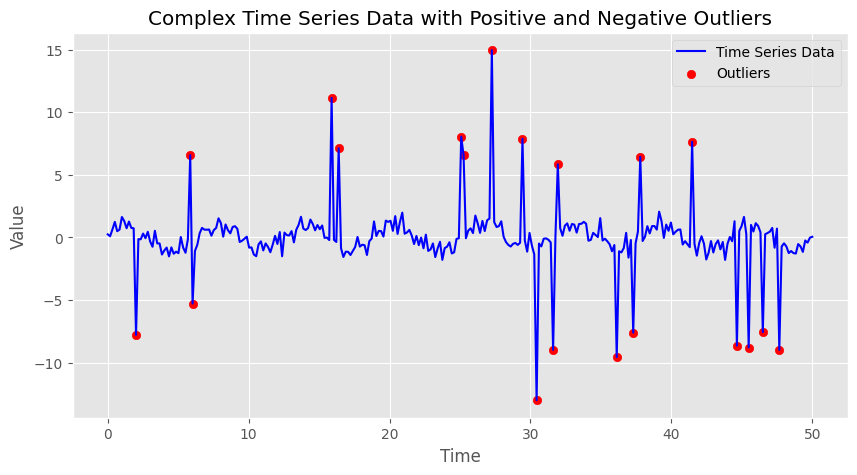

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Seed for reproducibility
np.random.seed(42)

# Generate a sine wave dataset
x = np.linspace(0, 50, 300)
y = np.sin(x)

# Introduce noise
y += np.random.normal(scale=0.5, size=y.shape)

# Add positive and negative outliers
positive_outliers = np.random.randint(0, 300, 10)
negative_outliers = np.random.randint(0, 300, 10)
y[positive_outliers] += np.random.normal(loc=8, scale=2, size=positive_outliers.shape)
y[negative_outliers] -= np.random.normal(loc=8, scale=2, size=negative_outliers.shape)

# Combine positive and negative outliers into a single array
all_outliers = np.concatenate([positive_outliers, negative_outliers])

# Plotting the time series data with outliers
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Time Series Data', color='blue')
plt.scatter(x[all_outliers], y[all_outliers], color='red', label='Outliers')
#plt.scatter(x[negative_outliers], y[negative_outliers], color='blue', label='Negative Outliers')
plt.title('Complex Time Series Data with Positive and Negative Outliers')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

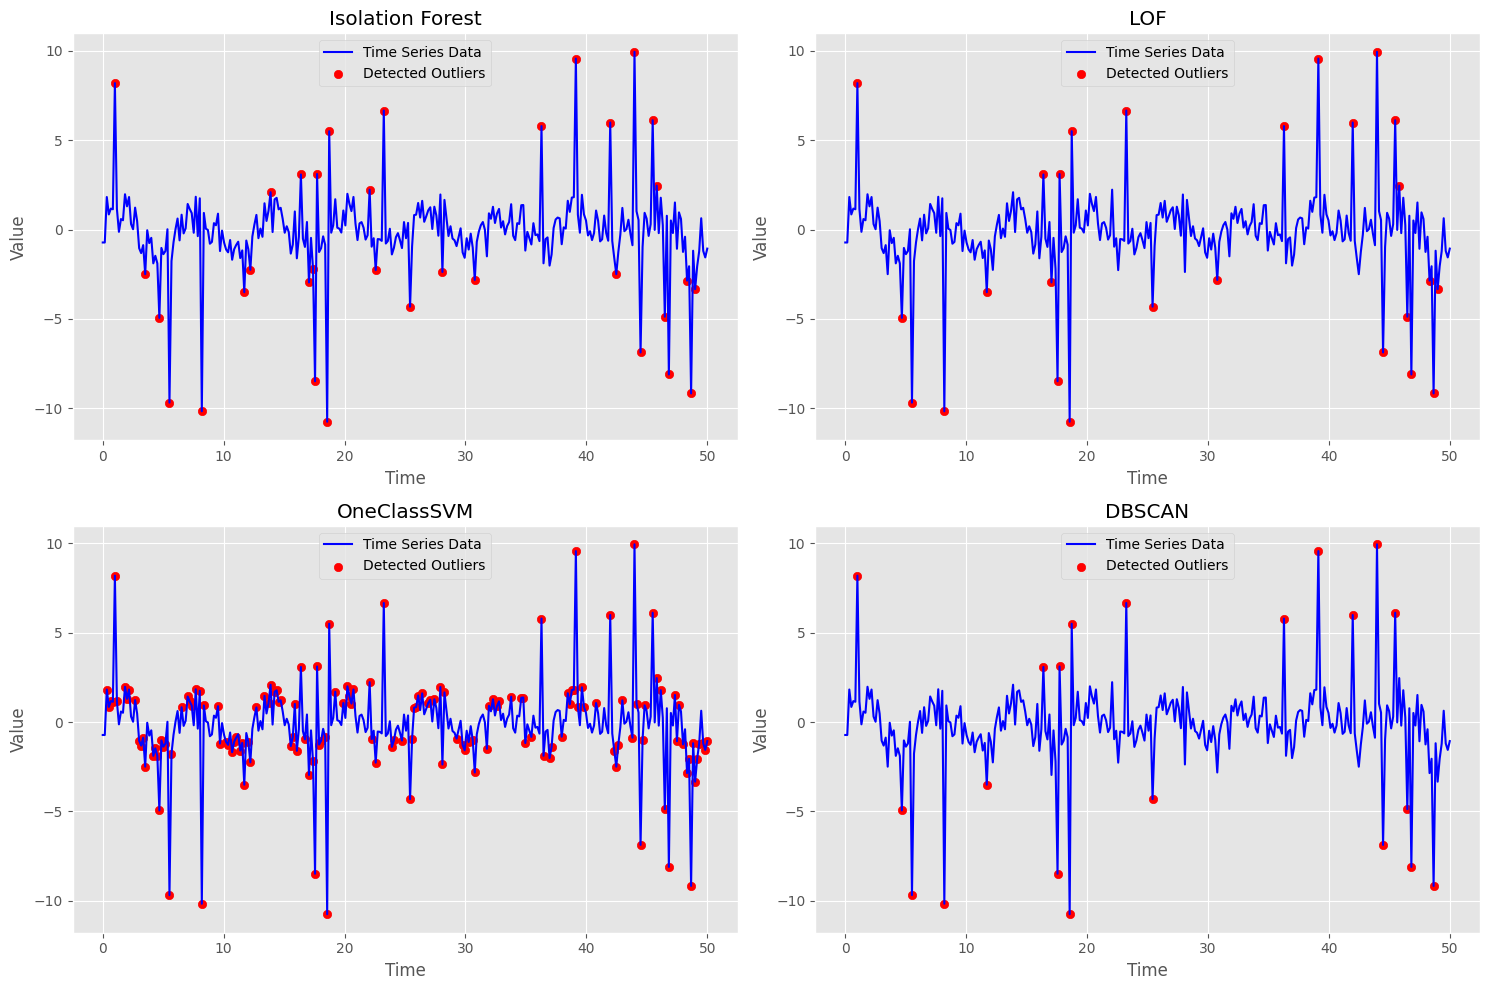

Evaluation Metrics:

Isolation Forest:
Silhouette Score: 0.6698745874814538
Davies-Bouldin Index: 5.41273781517008
Calinski-Harabasz Index: 7.242805520564062
Dunn Index: 0.004365005626930014

LOF:
Silhouette Score: 0.7187716657338343
Davies-Bouldin Index: 6.93198359515724
Calinski-Harabasz Index: 4.805004329414596
Dunn Index: 0.011039487106882757

OneClassSVM:
Silhouette Score: 0.190218589577964
Davies-Bouldin Index: 21.582494829065467
Calinski-Harabasz Index: 0.21802973733399614
Dunn Index: 0.0009678325410913285

DBSCAN:
Silhouette Score: 0.7502638094933474
Davies-Bouldin Index: 10.488570598472855
Calinski-Harabasz Index: 2.208740444710608
Dunn Index: 0.008193361701612157


Best model based on Silhouette Score: DBSCAN (0.7502638094933474)
Best model based on Davies-Bouldin Index: Isolation Forest (5.41273781517008)
Best model based on Calinski-Harabasz Index: Isolation Forest (7.242805520564062)
Best model based on Dunn Index: LOF (0.011039487106882757)


In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances

def dunn_index(X, labels):
    distances = pairwise_distances(X)
    unique_clusters = np.unique(labels)
    min_inter_cluster = np.inf
    for i in unique_clusters:
        for j in unique_clusters:
            if i != j:
                inter_cluster_dist = np.min(distances[labels == i][:, labels == j])
                if inter_cluster_dist < min_inter_cluster:
                    min_inter_cluster = inter_cluster_dist
    max_intra_cluster = 0
    for k in unique_clusters:
        intra_cluster_dist = np.max(distances[labels == k][:, labels == k])
        if intra_cluster_dist > max_intra_cluster:
            max_intra_cluster = intra_cluster_dist
    return min_inter_cluster / max_intra_cluster if max_intra_cluster > 0 else 0
# Seed for reproducibility
#np.random.seed(0)

# Generate a sine wave dataset
x = np.linspace(0, 50, 300)
y = np.sin(x)

# Introduce noise
y += np.random.normal(scale=0.8, size=y.shape)

# Add positive and negative outliers
positive_outliers = np.random.randint(0, 300, 10)
negative_outliers = np.random.randint(0, 300, 10)
y[positive_outliers] += np.random.normal(loc=8, scale=2, size=positive_outliers.shape)
y[negative_outliers] -= np.random.normal(loc=8, scale=2, size=negative_outliers.shape)

# Combine positive and negative outliers into a single array
all_outliers = np.concatenate([positive_outliers, negative_outliers])

X = y.reshape(-1, 1)  # Reshape data for the models

# Define outlier detection models
models = {
    "Isolation Forest": IsolationForest(),
    "LOF": LocalOutlierFactor( novelty=False),
    "OneClassSVM": OneClassSVM(),
    "DBSCAN": DBSCAN()
}

# Create plots for each model's results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

metrics = {}

# Plotting and evaluating each model
for i, (name, model) in enumerate(models.items()):
    # Fit model and predict labels
    if name == "LOF":
        model.fit(X)
        labels = model.fit_predict(X)
    else:
        labels = model.fit_predict(X)

    # Compute the Silhouette Score for those that output cluster labels
    if np.unique(labels).size > 1:  # More than 1 cluster is needed for silhouette score
        silhouette = silhouette_score(X, labels)
        davies = davies_bouldin_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)
        Dunn_Index= dunn_index(X, labels)

        metrics[name] = {
            'Silhouette Score': silhouette,
            'Davies-Bouldin Index': davies,
            'Calinski-Harabasz Index': calinski,
            'Dunn Index': Dunn_Index
        }

    # Mark inliers and outliers for plotting
    inliers = X[labels == 1]
    outliers = X[labels == -1]
    
    # Plot
    axs[i].plot(x, y, label='Time Series Data', color='blue')
    axs[i].scatter(x[labels == -1], outliers, color='red', label='Detected Outliers')
    axs[i].set_title(f'{name}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()

# # Print evaluation metrics
# print("Evaluation Metrics:")
# for algorithm, scores in metrics.items():
#     print(f"\n{algorithm}:")
#     for score_name, score_value in scores.items():
#         print(f"{score_name}: {score_value}")


# Determine best model based on each metric
best_silhouette = max(metrics, key=lambda x: metrics[x]['Silhouette Score'])
best_davies = min(metrics, key=lambda x: metrics[x]['Davies-Bouldin Index'])
best_calinski = max(metrics, key=lambda x: metrics[x]['Calinski-Harabasz Index'])
best_dunn_index = max(metrics, key=lambda x: metrics[x]['Dunn Index'])

print("\n===================================\n")

print(f"Best model based on Silhouette Score: {best_silhouette} ({metrics[best_silhouette]['Silhouette Score']})")
print(f"Best model based on Davies-Bouldin Index: {best_davies} ({metrics[best_davies]['Davies-Bouldin Index']})")
print(f"Best model based on Calinski-Harabasz Index: {best_calinski} ({metrics[best_calinski]['Calinski-Harabasz Index']})")
print(f"Best model based on Dunn Index: {best_dunn_index} ({metrics[best_dunn_index]['Dunn Index']})")


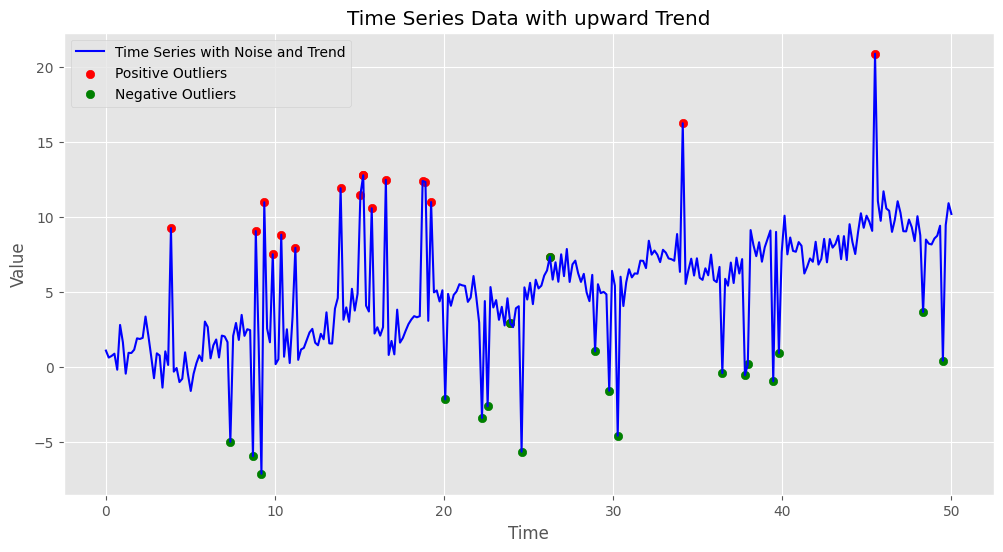

In [184]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data():
    x = np.linspace(0, 50, 300)
    # Select a trend type randomly
    trend_type = np.random.choice(['upward', 'downward', 'mixed'])
    
    if trend_type == 'upward':
        trend = np.linspace(0, 10, 300)
    elif trend_type == 'downward':
        trend = np.linspace(10, 0, 300)
    else:
        # Mixed trend: first half upward, second half downward
        trend = np.concatenate([np.linspace(0, 10, 150), np.linspace(10, 0, 150)])
    
    # Base sine wave with added trend
    y = np.sin(x) + trend
    
    # Add random noise
    y += np.random.normal(scale=0.8, size=x.shape)
    
    # Introduce outliers with more variation
    num_outliers = np.random.randint(5, 20)  # Random number of outliers
    positive_outliers = np.random.randint(0, 300, num_outliers)
    negative_outliers = np.random.randint(0, 300, num_outliers)
    y[positive_outliers] += np.random.normal(loc=8, scale=1, size=positive_outliers.shape)
    y[negative_outliers] -= np.random.normal(loc=8, scale=1, size=negative_outliers.shape)
    
    # Reshape data for the models
    X = y.reshape(-1, 1)
    return X, x, y, positive_outliers, negative_outliers, trend_type

# Generate data
X, x, y, positive_outliers, negative_outliers, trend_type = generate_data()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Time Series with Noise and Trend', color='blue')
plt.scatter(x[positive_outliers], y[positive_outliers], color='red', label='Positive Outliers')
plt.scatter(x[negative_outliers], y[negative_outliers], color='green', label='Negative Outliers')
plt.title(f'Time Series Data with {trend_type} Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances

def dunn_index(X, labels):
    distances = pairwise_distances(X)
    unique_clusters = np.unique(labels)
    min_inter_cluster = np.inf
    for i in unique_clusters:
        for j in unique_clusters:
            if i != j:
                inter_cluster_dist = np.min(distances[labels == i][:, labels == j])
                if inter_cluster_dist < min_inter_cluster:
                    min_inter_cluster = inter_cluster_dist
    max_intra_cluster = 0
    for k in unique_clusters:
        intra_cluster_dist = np.max(distances[labels == k][:, labels == k])
        if intra_cluster_dist > max_intra_cluster:
            max_intra_cluster = intra_cluster_dist
    return min_inter_cluster / max_intra_cluster if max_intra_cluster > 0 else 0

def generate_data():
    x = np.linspace(0, 50, 300)
    # Select a trend type randomly
    trend_type = np.random.choice(['upward', 'downward', 'mixed'])
    
    if trend_type == 'upward':
        trend = np.linspace(0, 10, 300)
    elif trend_type == 'downward':
        trend = np.linspace(10, 0, 300)
    else:
        # Mixed trend: first half upward, second half downward
        trend = np.concatenate([np.linspace(0, 10, 150), np.linspace(10, 0, 150)])
    
    # Base sine wave with added trend
    y = np.sin(x) + trend
    
    # Add random noise
    y += np.random.normal(scale=0.8, size=x.shape)
    
    # Introduce outliers with more variation
    num_outliers = np.random.randint(5, 20)  # Random number of outliers
    positive_outliers = np.random.randint(0, 300, num_outliers)
    negative_outliers = np.random.randint(0, 300, num_outliers)
    y[positive_outliers] += np.random.normal(loc=8, scale=1, size=positive_outliers.shape)
    y[negative_outliers] -= np.random.normal(loc=8, scale=1, size=negative_outliers.shape)
    
    # Reshape data for the models
    X = y.reshape(-1, 1)
    return X, x, y


def evaluate_models(X):
    models = {
        "Isolation Forest": IsolationForest(),
        "LOF": LocalOutlierFactor(novelty=False),
        "OneClassSVM": OneClassSVM(),
        "DBSCAN": DBSCAN()
    }
    metrics = {}
    for name, model in models.items():
        labels = model.fit_predict(X)
        if np.unique(labels).size > 1:
            metrics[name] = {
                'Silhouette Score': silhouette_score(X, labels),
                'Davies-Bouldin Index': davies_bouldin_score(X, labels),
                'Calinski-Harabasz Index': calinski_harabasz_score(X, labels),
                'Dunn Index': dunn_index(X, labels)
            }
    return metrics

def monte_carlo_simulation(n_runs=100):
    winners = {'Silhouette Score': {}, 'Davies-Bouldin Index': {}, 'Calinski-Harabasz Index': {}, 'Dunn Index': {}}
    for _ in range(n_runs):
        X, x, y = generate_data()
        metrics = evaluate_models(X)
        for metric in winners.keys():
            if metric == 'Davies-Bouldin Index':
                best_model = min(metrics, key=lambda x: metrics[x][metric])
            else:
                best_model = max(metrics, key=lambda x: metrics[x][metric])
            winners[metric][best_model] = winners[metric].get(best_model, 0) + 1
    return winners

# Run the simulation
results = monte_carlo_simulation()

# Display the results
for metric, result in results.items():
    print(f"\n{metric}:")
    for model, count in result.items():
        print(f"{model}: {count} wins")



Silhouette Score:
DBSCAN: 80 wins
LOF: 20 wins

Davies-Bouldin Index:
Isolation Forest: 22 wins
DBSCAN: 41 wins
LOF: 36 wins
OneClassSVM: 1 wins

Calinski-Harabasz Index:
Isolation Forest: 24 wins
DBSCAN: 45 wins
LOF: 30 wins
OneClassSVM: 1 wins

Dunn Index:
DBSCAN: 86 wins
LOF: 12 wins
Isolation Forest: 2 wins


In [186]:
def calculate_true_performance(X, true_outliers, labels_predicted):
    # This function calculates the accuracy of predicted outliers against the true outliers
    true_labels = np.zeros(X.shape[0])
    true_labels[true_outliers] = -1  # Mark true outliers
    predicted_labels = labels_predicted == -1  # Get predicted outliers as boolean array
    true_positive = np.sum(predicted_labels & (true_labels == -1))
    false_positive = np.sum(predicted_labels & (true_labels != -1))
    false_negative = np.sum(~predicted_labels & (true_labels == -1))
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

def generate_data():
    x = np.linspace(0, 50, 300)
    trend_type = np.random.choice(['upward', 'downward', 'mixed'])
    trend = np.linspace(0, 10, 300) if trend_type == 'upward' else np.linspace(10, 0, 300)
    if trend_type == 'mixed':
        trend = np.concatenate([np.linspace(0, 10, 150), np.linspace(10, 0, 150)])
    y = np.sin(x) + trend + np.random.normal(scale=0.8, size=x.shape)
    num_outliers = np.random.randint(5, 20)
    positive_outliers = np.random.randint(0, 300, num_outliers)
    negative_outliers = np.random.randint(0, 300, num_outliers)
    all_outliers = np.concatenate([positive_outliers, negative_outliers])
    y[all_outliers] += np.random.normal(loc=8, scale=1, size=all_outliers.shape)
    X = y.reshape(-1, 1)
    return X, x, y, all_outliers

def monte_carlo_simulation(n_runs=200):
    metric_agreement_count = {metric: 0 for metric in ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Dunn Index']}
    for _ in range(n_runs):
        X, x, y, true_outliers = generate_data()
        metrics = evaluate_models(X)
        true_performance_scores = {model: calculate_true_performance(X, true_outliers, models[model].fit_predict(X)) for model in models}
        actual_best_model = max(true_performance_scores, key=true_performance_scores.get)
        metric_winner = {metric: (min(metrics, key=lambda x: metrics[x][metric]) if metric == 'Davies-Bouldin Index' else max(metrics, key=lambda x: metrics[x][metric])) for metric in metrics[next(iter(metrics))]}
        for metric, model in metric_winner.items():
            if model == actual_best_model:
                metric_agreement_count[metric] += 1
    return metric_agreement_count

# Run the simulation
results = monte_carlo_simulation()

# Display the results
for metric, count in results.items():
    print(f"{metric}: {count} runs agreed with the actual best model")


Silhouette Score: 122 runs agreed with the actual best model
Davies-Bouldin Index: 130 runs agreed with the actual best model
Calinski-Harabasz Index: 130 runs agreed with the actual best model
Dunn Index: 101 runs agreed with the actual best model


------------


### Problem Definition
The primary goal is to evaluate the effectiveness of various anomaly detection algorithms in identifying outliers within synthetic time series data, and to determine which of several clustering metrics most accurately reflects the correct outlier detection as per the ground truth. The anomaly detection algorithms considered are DBSCAN, Isolation Forest, LOF (Local Outlier Factor), and OneClassSVM. The metrics used to assess these algorithms are F1 Score (for accuracy against ground truth), Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index, and Dunn Index.

### Solution Outline

#### Step 1: Data Generation
- **Generate Synthetic Time Series Data**: Simulate time series data with inherent trends, noise, and deliberately injected outliers. This dataset changes dynamically with each run to ensure the robustness of the findings.

#### Step 2: Anomaly Detection
- **Implement Anomaly Detection Algorithms**: Apply the selected algorithms (DBSCAN, Isolation Forest, LOF, and OneClassSVM) to the generated datasets to identify outliers.

#### Step 3: Evaluation Metrics Calculation
- **Calculate Detection Accuracy Metrics**: Compute the F1 Score, Precision, and Recall for each algorithm based on how well they identify outliers against the ground truth labels.
- **Calculate Clustering Quality Metrics**: Determine the Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index, and Dunn Index for each algorithm's output to assess the quality of clustering.

#### Step 4: Monte Carlo Simulation
- **Run Multiple Simulations**: Execute the above steps multiple times (Monte Carlo simulation) to ensure statistical reliability and robustness of the results. This helps in understanding the consistency of each algorithm across varied datasets.

#### Step 5: Correlation Analysis
- **Correlate F1 Scores with Clustering Metrics**: Analyze how each clustering metric correlates with the F1 Scores across all runs and algorithms to identify which metric aligns best with the ground truth recognition of outliers.

#### Step 6: Regression Analysis
- **Predict F1 Scores from Clustering Metrics**: Use regression analysis to determine how well the clustering metrics can predict the F1 Scores, thereby quantifying the predictive power of each metric regarding anomaly detection performance.

#### Step 7: Visual Analysis
- **Plot Metrics vs. F1 Scores**: Visually inspect the relationship between each clustering metric and the F1 Scores through scatter plots to observe trends, outliers, and anomalies in the relationship.

#### Step 8: Interpretation and Conclusion
- **Interpret Results**: Based on the correlation, regression, and visual analyses, conclude which clustering metric best represents the effectiveness of outlier detection algorithms in relation to the ground truth. This helps in selecting appropriate metrics for evaluating anomaly detection in similar datasets.

By following this structured approach, you can robustly assess the effectiveness of different anomaly detection algorithms and understand which clustering metrics provide the most accurate reflection of their performance against the actual occurrence of outliers. This comprehensive evaluation is critical for selecting the right tools and metrics for practical applications in anomaly detection.

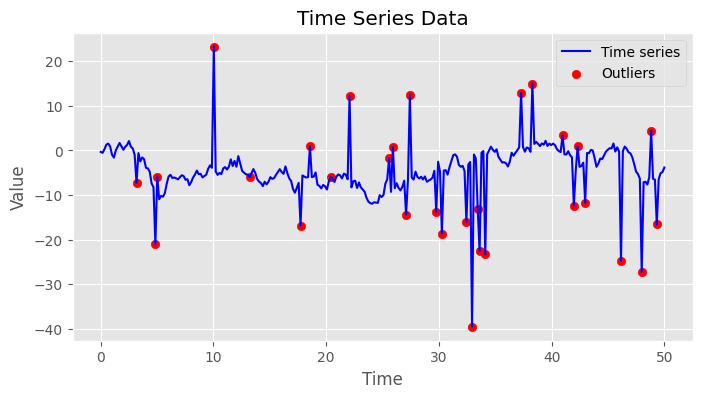

In [293]:
import matplotlib.pyplot as plt
import numpy as np

# Your function to generate time series data
def generate_time_series(n_samples=300, n_outliers=30):
    np.random.seed(np.random.randint(10000))
    t = np.linspace(0, 50, n_samples)
    y = np.cumsum(np.random.randn(n_samples)) + np.sin(t)  # Adding trend and noise
    outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
    y[outlier_indices] += 15 * np.random.randn(n_outliers)  # Injecting outliers
    
    # Create labels (1 for outlier, 0 for inlier)
    labels = np.zeros(n_samples, dtype=int)
    labels[outlier_indices] = 1
    return y.reshape(-1, 1), labels

# Generate the time series data
y, labels = generate_time_series()

# Create a time vector
t = np.linspace(0, 50, len(y))

# Plot the time series data
plt.figure(figsize=(8, 4))
plt.plot(t, y, label='Time series', color='blue')
plt.scatter(t[labels == 1], y[labels == 1], color='red', label='Outliers')  # Mark the outliers in red
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.legend()
plt.show()


In [264]:
from sklearn.metrics import f1_score, precision_score, recall_score

def generate_time_series(n_samples=300, n_outliers=30):
    """Generate synthetic time series data with trends, noise, and outliers."""
    np.random.seed(np.random.randint(1000))
    t = np.linspace(0, 50, n_samples)
    y = np.cumsum(np.random.randn(n_samples)) + np.sin(t)  # Adding trend and noise
    outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
    y[outlier_indices] += 15 * np.random.randn(n_outliers)  # Injecting outliers
    
    # Create labels (1 for outlier, 0 for inlier)
    labels = np.zeros(n_samples, dtype=int)
    labels[outlier_indices] = 1
    return y.reshape(-1, 1), labels

def monte_carlo_simulation(runs=200):
    """Perform a Monte Carlo simulation to evaluate anomaly detection algorithms."""
    columns = ['Algorithm', 'F1 Score', 'Precision', 'Recall', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Dunn Index']
    results = pd.DataFrame(columns=columns)
    
    for run in range(runs):
        data, true_labels = generate_time_series()
        
        algorithms = {
            'Isolation Forest': IsolationForest(),
            'LOF': LocalOutlierFactor(novelty=True),
            'OneClassSVM': OneClassSVM(),
            'DBSCAN': DBSCAN()
        }
        
        for name, alg in algorithms.items():
            if name == 'DBSCAN':
                predicted_labels = alg.fit_predict(data)
                predicted_labels = (predicted_labels == -1).astype(int)
            else:
                alg.fit(data)
                predicted_labels = alg.predict(data)
                predicted_labels = (predicted_labels == -1).astype(int)
            
            # Calculate performance metrics
            f1 = f1_score(true_labels, predicted_labels)
            precision = precision_score(true_labels, predicted_labels)
            recall = recall_score(true_labels, predicted_labels)
            
            # Calculate clustering quality metrics (avoid for DBSCAN if only one label)
            silhouette = silhouette_score(data, predicted_labels) if np.unique(predicted_labels).size > 1 else None
            davies = davies_bouldin_score(data, predicted_labels) if np.unique(predicted_labels).size > 1 else None
            calinski = calinski_harabasz_score(data, predicted_labels) if np.unique(predicted_labels).size > 1 else None
            dunn = dunn_index(data, predicted_labels)
            
            result = pd.DataFrame([[name, f1, precision, recall, silhouette, davies, calinski, dunn]], columns=columns)
            results = pd.concat([results, result], ignore_index=True)
    
    return results

# Run the simulation and print results
results = monte_carlo_simulation()
print(results.groupby('Algorithm').mean())  # Display average results by algorithm


                  F1 Score  Precision    Recall  Silhouette Score  \
Algorithm                                                           
DBSCAN            0.599776   0.755388  0.517500          0.611126   
Isolation Forest  0.559897   0.555714  0.580167          0.555709   
LOF               0.598970   0.806243  0.492000          0.618693   
OneClassSVM       0.260416   0.156294  0.780167          0.155122   

                  Davies-Bouldin Index  Calinski-Harabasz Index  Dunn Index  
Algorithm                                                                    
DBSCAN                        5.784088                17.356854    0.009785  
Isolation Forest             10.701462                 9.602347    0.002396  
LOF                           5.811883                18.291225    0.005352  
OneClassSVM                  32.825518                 1.876504    0.000325  


P-values for testing null hypothesis that the correlation is zero:
                        F1 Score Silhouette Score Davies-Bouldin Index  \
F1 Score                       -              0.0                  0.0   
Silhouette Score             0.0                -                  0.0   
Davies-Bouldin Index         0.0              0.0                    -   
Calinski-Harabasz Index      0.0              0.0                  0.0   
Dunn Index                   0.0              0.0                  0.0   

                        Calinski-Harabasz Index Dunn Index  
F1 Score                                    0.0        0.0  
Silhouette Score                            0.0        0.0  
Davies-Bouldin Index                        0.0        0.0  
Calinski-Harabasz Index                       -        0.0  
Dunn Index                                  0.0          -  


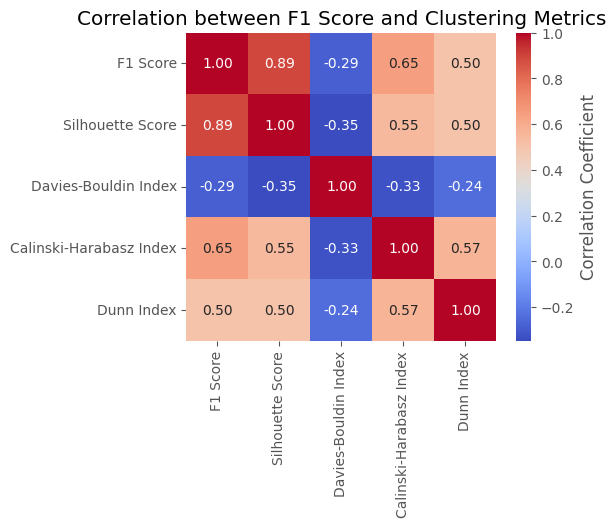

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Prepare a DataFrame to store p-values
p_values = pd.DataFrame(index=['F1 Score', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Dunn Index'],
                        columns=['F1 Score', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Dunn Index'])

# Compute correlation matrix and corresponding p-values
for row in p_values.columns:
    for col in p_values.index:
        if row != col:
            corr, p_value = pearsonr(results[row], results[col])
            correlation_matrix.loc[row, col] = corr
            p_values.loc[row, col] = p_value
        else:
            p_values.loc[row, col] = '-'

# Visualize the correlation matrix with annotated p-values
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f",
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation between F1 Score and Clustering Metrics')

# Show p-values below the correlation matrix for clarity
print("P-values for testing null hypothesis that the correlation is zero:")
print(p_values)
plt.show()

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the data
X = results[['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Dunn Index']].values
y = results['F1 Score'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
print("Regression coefficients:", model.coef_)
print("Regression score (R^2):", model.score(X_test, y_test))


Regression coefficients: [ 6.53754271e-01  3.73726640e-04  3.72283325e-03 -2.00429918e+00]
Regression score (R^2): 0.8461919741750752


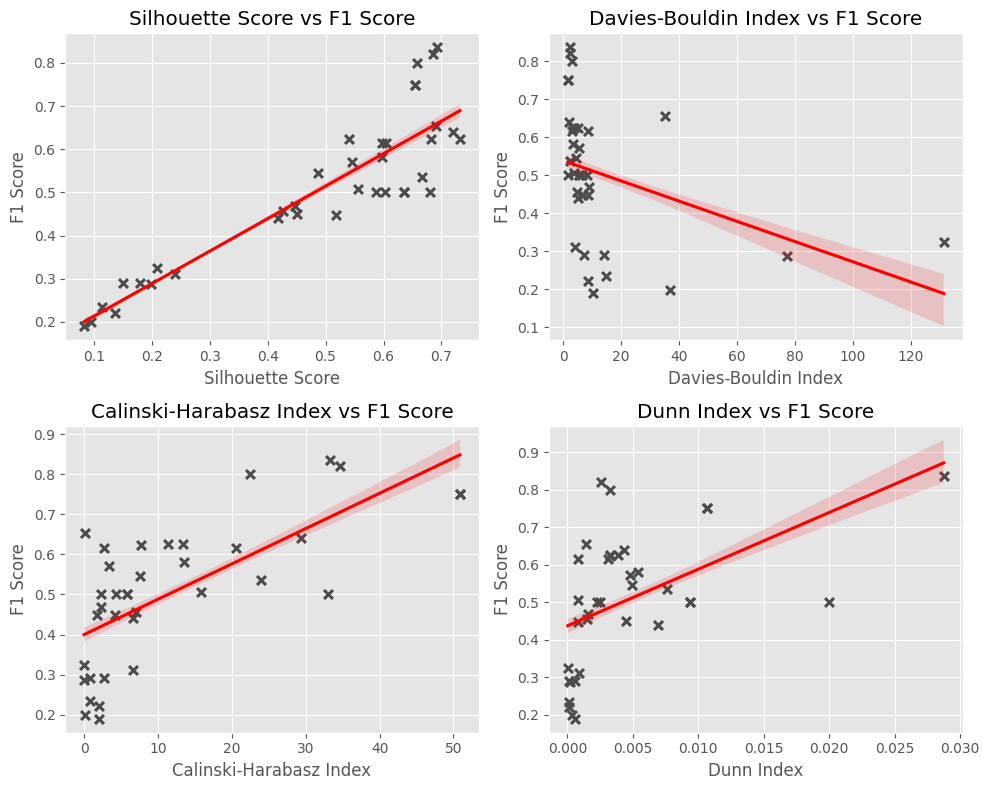

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot with regression line and confidence interval
sns.regplot(ax=axes[0, 0], data=results, x='Silhouette Score', y='F1 Score', ci=95, marker="x", color=".3", line_kws=dict(color="r"))
axes[0, 0].set_title('Silhouette Score vs F1 Score')

sns.regplot(ax=axes[0, 1], data=results, x='Davies-Bouldin Index', y='F1 Score', ci=95, marker="x", color=".3", line_kws=dict(color="r"))
axes[0, 1].set_title('Davies-Bouldin Index vs F1 Score')

sns.regplot(ax=axes[1, 0], data=results, x='Calinski-Harabasz Index', y='F1 Score', ci=95, marker="x", color=".3", line_kws=dict(color="r"))
axes[1, 0].set_title('Calinski-Harabasz Index vs F1 Score')

sns.regplot(ax=axes[1, 1], data=results, x='Dunn Index', y='F1 Score', ci=95, marker="x", color=".3", line_kws=dict(color="r"))
axes[1, 1].set_title('Dunn Index vs F1 Score')

plt.tight_layout()
plt.show()
